In [1]:
import itertools
import random

%matplotlib inline
import networkx as nx

## BA model from chapter 5 tutorial
The following piece of code comes from the tutorial of chapter 5 of "A first course in network science" by Filipo Menczer et al.

[The tutorial is available on github.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%205%20Tutorial.ipynb)

In [2]:
def barabasi_albert_graph(N, m):
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

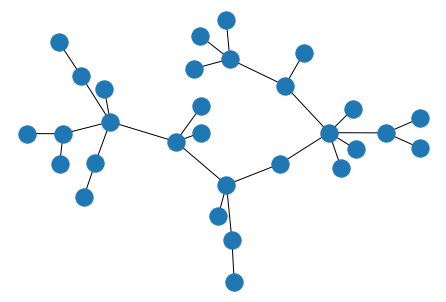

In [3]:
G = barabasi_albert_graph(30, 1)
nx.draw(G)

One might wonder why, in the previous code for `preferential_attachment_graph`, we didn't just write step 2 as

    new_neighbors = random.choices(G.nodes, degrees, k=m)
    
The issue here is that when one specifies $k > 1$ for `random.choices`, the selection is made with replacement, *i.e.* the same node can be selected from the list multiple times. The more complicated code is necessary so that we choose $m$ different nodes to join with node $i$.

### NetworkX function

As with all of these graph models, NetworkX has a function to generate a BA model: [barabasi_albert_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html).

## Non-linear BA
I've adapted the BA model function slightly to turn it in the non-linear BA model. The only difference is that `degrees` has been replaced with the variable `priorities` that adds the exponent `alpha` to the degrees.

In [15]:
def non_linear_ba_graph(N, m, alpha=1):
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            priorities = [pow(G.degree(n), alpha) for n in possible_neighbors]
            j = random.choices(possible_neighbors, priorities)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

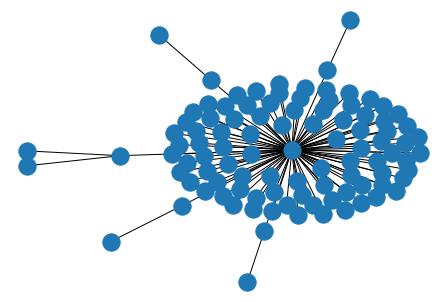

In [16]:
G = non_linear_ba_graph(100, 1, 2)
nx.draw(G)


(array([99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1., 10., 19., 28., 37., 46., 55., 64., 73., 82., 91.]),
 <BarContainer object of 10 artists>)

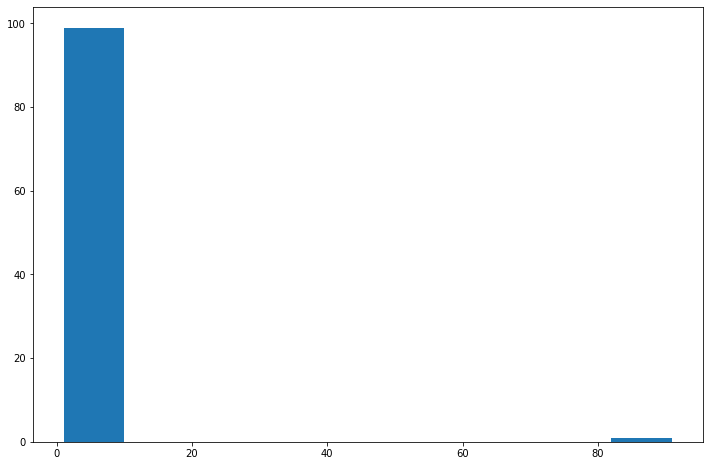

In [6]:
import matplotlib.pyplot as plt

degrees = [d for _, d in G.degree()]

plt.figure(figsize=(12, 8))
plt.hist(degrees)

## Attractiveness model
This time, a constant value indicating intrinsic attractiveness is added to the degrees.

In [7]:
def attractiveness_graph(N, m, attractiveness=0):
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) + attractiveness for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

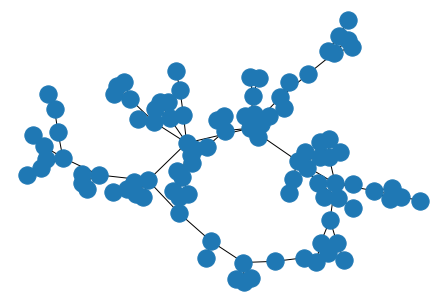

In [8]:
G = attractiveness_graph(100, 1, 5)
nx.draw(G)

(array([58., 19.,  9.,  6.,  4.,  0.,  3.,  0.,  0.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

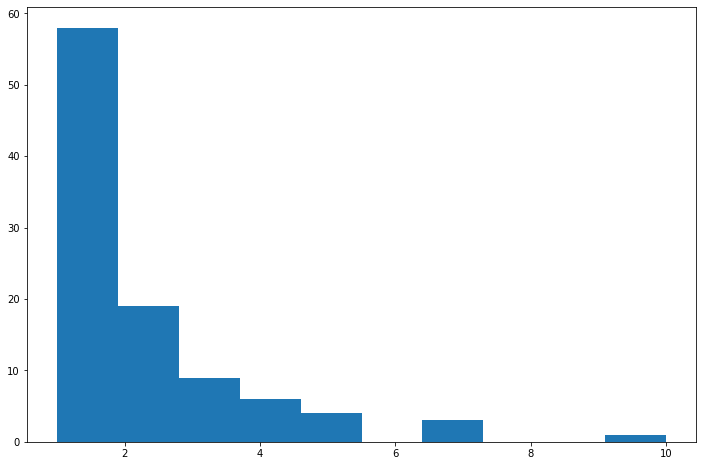

In [9]:
degrees = [d for _, d in G.degree()]

plt.figure(figsize=(12, 8))
plt.hist(degrees)

## Fitness model
Instead of a constant attractiveness for every node, the fitness model multiplies the degree with a value indicating fitness that is different for every node.

In my implementation I sample from a uniform distribution to generate fitness value but depending on the usecase a different method might apply.

In [17]:
import numpy as np

def fitness_graph(N, m, max_fitness=1):
    # Compute fitness beforehand, I've chosen a uniform distribution
    fitness = np.random.uniform(1, max_fitness, N)
    
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) * fitness[idx]  for idx, n in enumerate(possible_neighbors)]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

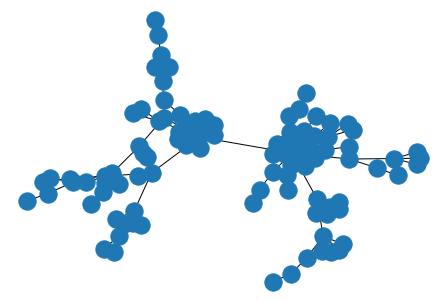

In [18]:
G = fitness_graph(100, 1, 100)
nx.draw(G)

(array([82., 12.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

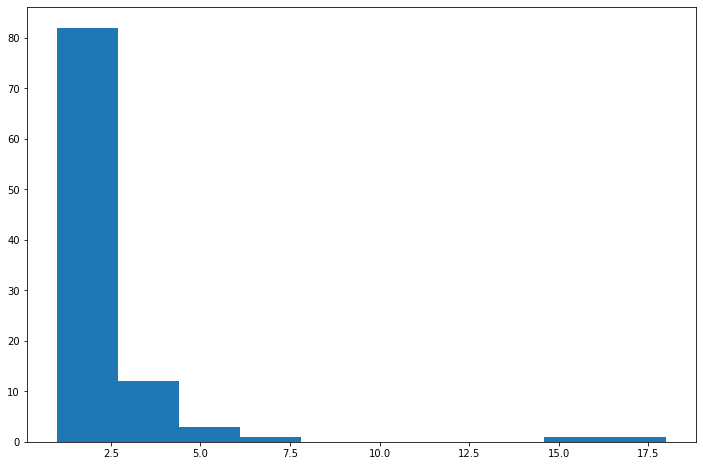

In [19]:
degrees = [d for _, d in G.degree()]

plt.figure(figsize=(12, 8))
plt.hist(degrees)